### Import CIFAR-10 Data

In [29]:
import numpy as np
import pickle
import sys
import matplotlib.pyplot as plt

- load **images data** and **labels** from files

In [30]:
def load_CIFAR10_batch(filename):
    with open(filename, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')

        x = dict[b'data']
        y = dict[b'labels']
        y = np.array(y)
    return x, y

### Merge Traing Data

- using *load_CIFAR10_batch* load files
- np.append & np.concatenate 

In [31]:
def load_data():
    xs = []
    ys = []
    for i in range(1, 6):
        filename = './cifar-10-batches-py/data_batch_' + str(i)
        X, Y = load_CIFAR10_batch(filename)
        xs.append(X)
        ys.append(Y)

    x_train = np.concatenate(xs)
    y_train = np.concatenate(ys)
    del xs, ys
    x_test, y_test = load_CIFAR10_batch('./cifar-10-batches-py/test_batch')

    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
    'ship', 'truck']

    # Normalize Data
#     mean_image = np.mean(x_train, axis=0)
#     x_train -= mean_image
#     x_test -= mean_image

    data_dict = {
        'images_train': x_train,
        'labels_train': y_train,
        'images_test': x_test,
        'labels_test': y_test,
        'classes': classes
    }
    return data_dict

### Reshape Data
 *data_dict = load_data()*
- reshape [-1, 3072] to [-1, 3, 32, 32]
- transpoes [-1, 32, 32, 3]


In [32]:
def reshape_data(data_dict):
    im_tr = np.array(data_dict['images_train'])
    im_tr = np.reshape(im_tr, (-1, 3, 32, 32))
    im_tr = np.transpose(im_tr, (0,2,3,1))
    data_dict['images_train'] = im_tr
    im_te = np.array(data_dict['images_test'])
    im_te = np.reshape(im_te, (-1, 3, 32, 32))
    im_te = np.transpose(im_te, (0,2,3,1))
    data_dict['images_test'] = im_te
    return data_dict

### Generate Batch
 data = reshape_data(load_data())
- yield is a keyword that is used like return, except the function will return a generator.
    > **Python Code** 
```
    >>> def createGenerator():
    ...    mylist = range(3)
    ...    for i in mylist:
    ...        yield i*i
    ...
    >>> mygenerator = createGenerator() # create a generator
    >>> print(mygenerator) # mygenerator is an object!
 <generator object createGenerator at 0xb7555c34>
    >>> for i in mygenerator:
    ...     print(i)
    0
    1
    4
```

In [33]:
def gen_batch(data, batch_size, num_iter):
    data = np.array(data)
    index = len(data)
    for i in range(num_iter):
        index += batch_size
        if (index + batch_size > len(data)):
            index = 0
            shuffled_indices = np.random.permutation(np.arange(len(data)))
            data = data[shuffled_indices]
        yield data[index:index + batch_size]

In [34]:
def main():
    data_sets = load_data()
    print(data_sets['images_train'].shape)
    print(data_sets['labels_train'].shape)
    print(data_sets['images_test'].shape)
    print(data_sets['labels_test'].shape)

In [35]:
if __name__ == '__main__':
    main()

(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


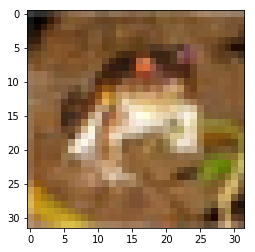

In [41]:
a = np.reshape(load_data()['images_train'][0],(3, 32, 32))
a = np.transpose(a, (1,2,0))
a.shape
plt.imshow(a)
plt.show()